#COVID-19:CORONA VIRUS INFECTION PROBABILITY

1.Here we will make a simple machine learning model to predict whether you have an coronavirus infection or not (or probability of having infection).

2.The data that we will use here is not an official data, it has been created randomly.

3.Because our data is not accurate here, it is not necessary to predict our model correctly.

4.Here we are just trying to understand how machine learning can help us.

If we have official and accurate data, then we can create an accurate model.

# IMPORTING LIBRARIES

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.metrics import mean_squared_error

In [43]:
#Reading csv file
Data=pd.read_csv('/content/randomdata.csv')
Data.head()

,Fever,Age,BodyPain,DifficultyinBreath,RunnyNose,Travel,Cough,Probability
0,101,65,1,0,0,1,1,1
1,98,59,0,1,0,1,1,0
2,103,46,0,1,1,0,0,0
3,104,83,0,0,0,0,1,0
4,98,98,0,0,1,0,0,0


**Note:** As you can see from the above output we have basic features of coronavirus infection (i.e.  fever, cold , age etc...) and our last column in data is a measure of all features (1, 0),where 1 means have an infection and 0 means no infection.

In [44]:
Data.columns

Index(['Fever ', 'Age', ' BodyPain', 'DifficultyinBreath', 'RunnyNose',
       'Travel ', 'Cough', 'Probability'],
      dtype='object')

In [45]:
#Information of Data
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Fever               1999 non-null   int64
 1   Age                 1999 non-null   int64
 2    BodyPain           1999 non-null   int64
 3   DifficultyinBreath  1999 non-null   int64
 4   RunnyNose           1999 non-null   int64
 5   Travel              1999 non-null   int64
 6   Cough               1999 non-null   int64
 7   Probability         1999 non-null   int64
dtypes: int64(8)
memory usage: 125.1 KB


Note:We have to check the information of the data so that we can do any correction that is required in data (null values, column type etc...). So that we don't face any problem in further processing the data.

#Defining our target (Y) and features (X)

In [46]:
X=Data.drop('Probability',axis=1)
X.head()

,Fever,Age,BodyPain,DifficultyinBreath,RunnyNose,Travel,Cough
0,101,65,1,0,0,1,1
1,98,59,0,1,0,1,1
2,103,46,0,1,1,0,0
3,104,83,0,0,0,0,1
4,98,98,0,0,1,0,0


In [47]:
Y=Data['Probability']
Y.head()

0    1
1    0
2    0
3    0
4    0
Name: Probability, dtype: int64

**Note:** In this section we have defined our target i.e. Y and features i.e. X. Basically,here our target is to find out the infection probability based on the features, so we have separated the column infection probability(Y) from other columns (X) (feature columns).

#Splitting train and test data

In [48]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.33,random_state=5)

In [49]:
#Converting into numpy array
print(x_train.to_numpy())
y_train.to_numpy()
x_test.to_numpy()
y_test.to_numpy()

[[101  16   1 ...   0   0   1]
 [ 98  25   1 ...   0   0   0]
 [104  53   0 ...   1   1   0]
 ...
 [103  63   0 ...   0   1   1]
 [104  38   1 ...   1   1   1]
 [ 98 100   0 ...   1   1   1]]


array([0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0,

#Training our model

In [50]:
#Importing logisticregression model

from sklearn.linear_model import LogisticRegression

clf =LogisticRegression()

#training the model

Y_train_pred=clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)

In [51]:
#accuracy of the model
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,y_pred)

print(score)

0.5075757575757576


#Using Decision Tree

In [52]:
from sklearn import tree
dtc = tree.DecisionTreeClassifier()
dtc.fit(x_train,y_train)



DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [53]:
from sklearn.metrics import mean_squared_error
y_predict=dtc.predict(x_test)

MSE = mean_squared_error(y_test, y_predict)
print("Mean squared error: ",MSE)


Mean squared error:  0.5196969696969697


In [54]:
#accuracy of the model
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,y_predict)

print(score)

0.4803030303030303


array([[150, 173],
       [170, 167]])

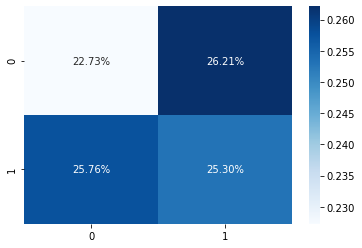

In [55]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_predict)
sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='Blues')
cm

As accuracy of logistic regression is more than decission tree we use logistic regression to predict furthur results

In [56]:
#Predicting using model 

#Infection (0,1) prediction 

infection=clf.predict([[98,20,0,1,0,0,0]])

#Infection probability prediction

infection_probability= clf.predict_proba([[98,20,0,0,0,0,1]])

print(infection)

print(infection_probability)

[0]
[[0.47974979 0.52025021]]


1.In this part, we have predicted infection and (infection probability) with the model we have prepared. 

2.As you can see from the output, we have two types of output. In the first output we have predicted directly (1 or 0), whereas in another we have calculated the probability of infection.

3.We used here logistic regression (Because of categorical data) , if you want you can use other model. (Model selection depends on accuracy of the model)